In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lectura datos

In [2]:
cobertura_original = pd.read_csv('datos originales/cobertura original.csv')
cobertura_original.head()

,Centro Poblado,Aeropuerto,Distancia(Km),Cobertura,Aerodromo,D_Aerodromo,Regional,D_Regional,Nacional,D_Nacional,Internacional,D_Internacional,Tipo_Cobertura
0,MEDELLÍN,OLAYA HERRERA,3.079673,True,VOLAR COLOMBIA,52.671796,ALI PIEDRAHITA,62.450942,OLAYA HERRERA,3.079673,JOSE M. CORDOVA,19.783629,Internacional
1,PALMITAS,OLAYA HERRERA,17.554548,True,CAROLINA DEL PRINCIPE,61.183427,ALI PIEDRAHITA,49.859213,OLAYA HERRERA,17.554548,JOSE M. CORDOVA,35.590645,Internacional
2,SANTA ELENA,INGENIO PROVIDENCIA,8.033558,True,INGENIO PROVIDENCIA,8.033558,FARFAN HERIBERTO GIL MAR,49.132545,BUENAVENTURA-GERARDO TOBAR LOPEZ,86.024466,ALFONSO BONILLA ARAGON,20.528524,Internacional
3,ALTAVISTA,OLAYA HERRERA,4.228790,True,VOLAR COLOMBIA,50.078598,ALI PIEDRAHITA,57.800802,OLAYA HERRERA,4.228790,JOSE M. CORDOVA,23.640644,Internacional
4,AGUAS FRÍAS,OLAYA HERRERA,5.142964,True,VOLAR COLOMBIA,51.181306,ALI PIEDRAHITA,56.869188,OLAYA HERRERA,5.142964,JOSE M. CORDOVA,24.658147,Internacional


## Remoción de columnas

In [11]:
cobertura_v1 = cobertura_original.drop(columns=['Aeropuerto', 'Distancia(Km)', 'Tipo_Cobertura'])

cobertura_aerodromo = (cobertura_v1['D_Aerodromo']< 40).rename('C_Aerodromo')
cobertura_regional = (cobertura_v1['D_Regional']< 40).rename('C_Regional')
cobertura_nacional = (cobertura_v1['D_Nacional']< 40).rename('C_Nacional')
cobertura_internacional = (cobertura_v1['D_Internacional']< 40).rename('C_Internacional')


cobertura_v1 = pd.concat([cobertura_v1, cobertura_aerodromo, cobertura_regional
                             , cobertura_nacional, cobertura_internacional], axis=1)


cobertura_v1.head()

,Centro Poblado,Cobertura,Aerodromo,D_Aerodromo,Regional,D_Regional,Nacional,D_Nacional,Internacional,D_Internacional,C_Aerodromo,C_Regional,C_Nacional,C_Internacional
0,MEDELLÍN,True,VOLAR COLOMBIA,52.671796,ALI PIEDRAHITA,62.450942,OLAYA HERRERA,3.079673,JOSE M. CORDOVA,19.783629,False,False,True,True
1,PALMITAS,True,CAROLINA DEL PRINCIPE,61.183427,ALI PIEDRAHITA,49.859213,OLAYA HERRERA,17.554548,JOSE M. CORDOVA,35.590645,False,False,True,True
2,SANTA ELENA,True,INGENIO PROVIDENCIA,8.033558,FARFAN HERIBERTO GIL MAR,49.132545,BUENAVENTURA-GERARDO TOBAR LOPEZ,86.024466,ALFONSO BONILLA ARAGON,20.528524,True,False,False,True
3,ALTAVISTA,True,VOLAR COLOMBIA,50.078598,ALI PIEDRAHITA,57.800802,OLAYA HERRERA,4.228790,JOSE M. CORDOVA,23.640644,False,False,True,True
4,AGUAS FRÍAS,True,VOLAR COLOMBIA,51.181306,ALI PIEDRAHITA,56.869188,OLAYA HERRERA,5.142964,JOSE M. CORDOVA,24.658147,False,False,True,True


### Saving

In [12]:
cobertura_v1.to_csv('datos modificados/cobertura_v1.csv', index= False)

## Generar archivo fechas


## Gráfica Benford

In [10]:
hecho = pd.read_csv('datos modificados/hecho_recaudo_trafico.csv')
recaudo = hecho['Recaudo']
recaudo = recaudo[recaudo != 0]
recaudo.head()

0    734081100
1    599925400
2    670704200
3    588188700
4    646357200
Name: Recaudo, dtype: int64

In [11]:
frecuencias = np.zeros(10)
frecuencias = [{ 'value': i, 'freq': 0} for i in range(10)]
print(frecuencias)

[{'value': 0, 'freq': 0}, {'value': 1, 'freq': 0}, {'value': 2, 'freq': 0}, {'value': 3, 'freq': 0}, {'value': 4, 'freq': 0}, {'value': 5, 'freq': 0}, {'value': 6, 'freq': 0}, {'value': 7, 'freq': 0}, {'value': 8, 'freq': 0}, {'value': 9, 'freq': 0}]


In [12]:
for index, value in recaudo.items():
    s = int(str(value)[0:1])
    frecuencias[s]['freq'] += 1

def sorting(x):
    return x['value']


frecuencias.sort(reverse=False ,key=sorting)

print(frecuencias)


[{'value': 0, 'freq': 0}, {'value': 1, 'freq': 858}, {'value': 2, 'freq': 586}, {'value': 3, 'freq': 349}, {'value': 4, 'freq': 322}, {'value': 5, 'freq': 202}, {'value': 6, 'freq': 120}, {'value': 7, 'freq': 69}, {'value': 8, 'freq': 111}, {'value': 9, 'freq': 119}]


### Graph

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[858, 586, 349, 322, 202, 120, 69, 111, 119]


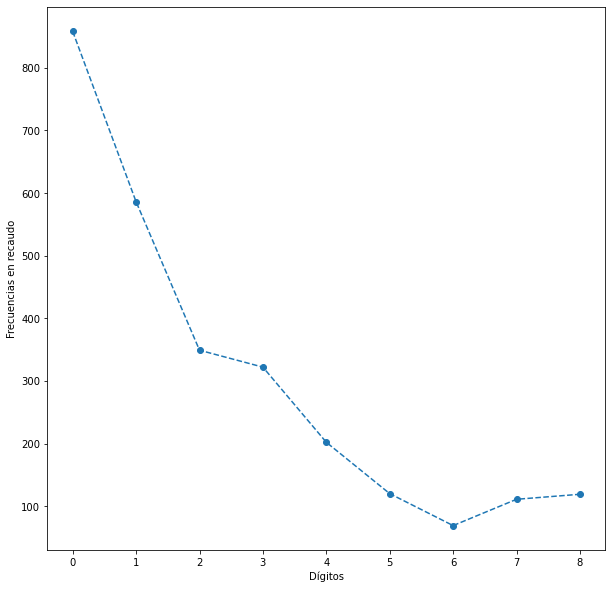

In [24]:
frecuencias_y = [frecuencias[i]['freq'] for i in range(1, len(frecuencias))]
frecuencias_x = [frecuencias[i]['value'] for i in range(1, len(frecuencias))]


frecuencias_series = pd.Series(frecuencias_x)

print(frecuencias_x)
print(frecuencias_y)

plt.rcParams["figure.figsize"] = (10,10)
plt.plot(frecuencias_y, linestyle='--', marker='o')
plt.xlabel('Dígitos')
plt.ylabel('Frecuencias en recaudo')
plt.show()

In [15]:
porcentaje_frecuencias = np.array(frecuencias_y)
porcentaje_frecuencias = porcentaje_frecuencias / np.sum(porcentaje_frecuencias)

print(porcentaje_frecuencias)

[0.31359649 0.21418129 0.12755848 0.11769006 0.07383041 0.04385965
 0.0252193  0.04057018 0.04349415]
